# eval for classification 

### embeddings

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./HR_comma_sep.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape,df.columns

((14999, 10), Index(['satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
        'promotion_last_5years', 'Department', 'salary'],
       dtype='object'))

### preprocessing

In [5]:
from sklearn import preprocessing


def label_encoder(df,column):
    le = preprocessing.LabelEncoder()
    df[column]=le.fit_transform(df[column])
    ohe = preprocessing.OneHotEncoder()
    temp_array = ohe.fit_transform(df[[column]]).toarray()
    column_names = [column+"_"+str(m) for m in le.classes_]
    return(pd.DataFrame(data=temp_array,columns = column_names))



In [6]:
categorical_variables = ["Department","salary"]
target_variable = ["left"]
numeric_variables = list(set(df.columns.values) - set(categorical_variables) -set(target_variable))   

### now spliting data

In [7]:
from sklearn.model_selection import train_test_split

new_df = df[numeric_variables]
for column in categorical_variables:
    new_df= pd.concat([new_df,label_encoder(df,column)],axis=1)
new_df.shape
new_df.columns
#Split into test and train 
X, X_test, y , y_test = train_test_split(new_df,df[target_variable],test_size=0.3)



In [8]:
new_df.shape,new_df.columns

((14999, 20),
 Index(['average_montly_hours', 'satisfaction_level', 'last_evaluation',
        'promotion_last_5years', 'Work_accident', 'number_project',
        'time_spend_company', 'Department_IT', 'Department_RandD',
        'Department_accounting', 'Department_hr', 'Department_management',
        'Department_marketing', 'Department_product_mng', 'Department_sales',
        'Department_support', 'Department_technical', 'salary_high',
        'salary_low', 'salary_medium'],
       dtype='object'))

### logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X,y)


C:\Users\Bharath\Anaconda\envs\keras\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:

y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_curve, f1_score,roc_auc_score
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[3163,  241],
       [ 715,  381]], dtype=int64)

In [12]:
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [13]:
precision_score(y_test,y_pred)
recall_score(y_test,y_pred)
f1_score(y_test,y_pred)
fpr,tpr,thresholds =  roc_curve(y_test,y_pred)


### now lets see in plot

In [14]:

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,"b")


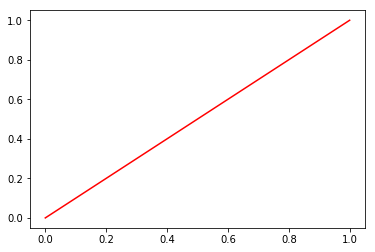

In [15]:
plt.plot([0,1],[0,1],"r-")


In [16]:

roc_auc_score(y_test,y_pred)



0.6384143386483914

### for better acc in Kfold 

In [17]:
from sklearn.model_selection import KFold, cross_val_score
model = LogisticRegression()

cv = KFold(n_splits=10)

for train_index, test_index in cv.split(X):
    model.fit(X.iloc[train_index],y.iloc[train_index,-1])    
    print(model.score(X.iloc[train_index],y.iloc[train_index,-1]))
    print(model.score(X.iloc[test_index],y.iloc[test_index,-1]))
    
   

0.7942639432744206
0.7980952380952381
0.80019049634882
0.780952380952381
0.7978622076410202
0.7647619047619048
0.7953222563234205
0.7961904761904762
0.8011429780929199
0.8019047619047619
0.79955550851942
0.8085714285714286
0.7973330511165203
0.8019047619047619
0.7951105937136205
0.8019047619047619
0.7980738702508202
0.8038095238095239
0.7958730158730158
0.8102955195424214


### trying in cross validation is much easier without Looping,, with almost the same acc

In [ ]:


cross_val_score(model,X,y["left"],cv=10)


### tryin another 2 types of cross validation method




#### GridSearchCV, RandomizedSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
C = uniform(loc=0, scale=4)

In [77]:
parameters = {"C":[0.001,0.01,0.1,0.5,1,5,10,100]}
parameters_2 = {"C":C}


In [78]:
cv_model = GridSearchCV(model, parameters)
cv_model.fit(X,y["left"])
cv_model.best_params_


{'C': 0.001}

In [81]:

cv_random = RandomizedSearchCV(model,param_distributions = parameters_2)
cv_random.fit(X,y["left"])
cv_random.best_estimator_ , cv_random.best_score_


(LogisticRegression(C=1.74594886871688, class_weight=None, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
 0.7589294218497)

## lets try randomforest for better acc 

In [83]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 1000,max_depth = 6, min_samples_split = 15)
model.fit(X,y["left"])

model.score(X,y["left"])
y_pred = model.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)


NameError: name 'y_test' is not defined

### even better acc in XGBoost

In [89]:
from xgboost import XGBClassifier
model2 = XGBClassifier(max_depth = 5,learning_rate = 0.01)

model2.fit(X,y["left"])

model2.score(X,y["left"])
y2_pred = model2.predict(X_test)
accuracy_score(y_test,y2_pred)

ImportError: No module named 'xgboost'